In [25]:
import os
import sys

dirname = '../../data/AmphiBase'

filename_fa = os.path.join(dirname, 'HYNQU_AB201711.prot.fa')

NOG_freq = dict()
f_fa = open(filename_fa,'r')
for line in f_fa:
    if line.startswith('>'):
        tmp_NOG = line.strip().split()[1].split('.')[1]
        if not tmp_NOG in NOG_freq:
            NOG_freq[tmp_NOG] = 0
        NOG_freq[tmp_NOG] += 1
f_fa.close()
sys.stderr.write('Read %s\n'%filename_fa)

GO_desc = dict()
f_desc = open(os.path.join(dirname, 'veNOG.GO_desc.txt'),'r')
for line in f_desc:
    tokens = line.strip().split("\t")
    GO_desc[tokens[0]] = tokens[2]
f_desc.close()

GO_freq = {'GO_BP':{}, 'GO_MF':{}, 'GO_CC':{}}
GO_annot = dict()
f_annot = open(os.path.join(dirname, 'veNOG.GO_annot.txt'),'r')
for line in f_annot:
    tokens = line.strip().split("\t")
    tmp_NOG = tokens[0]
    tmp_GO = tokens[2]
    tmp_GO_category = tokens[1]
    if not tmp_NOG in NOG_freq:
        continue
    
    if not tmp_GO in GO_freq[tmp_GO_category]:
        GO_freq[tmp_GO_category][tmp_GO] = 0
    GO_freq[tmp_GO_category][tmp_GO] += NOG_freq[tmp_NOG]
f_annot.close()

GO_term_list = dict()
for tmp_category in ['GO_BP','GO_MF','GO_CC']:
    GO_term_list[tmp_category] = sorted(GO_freq[tmp_category].keys(), key=GO_freq[tmp_category].get, reverse=True)


Read ../../data/AmphiBase\HYNQU_AB201711.prot.fa


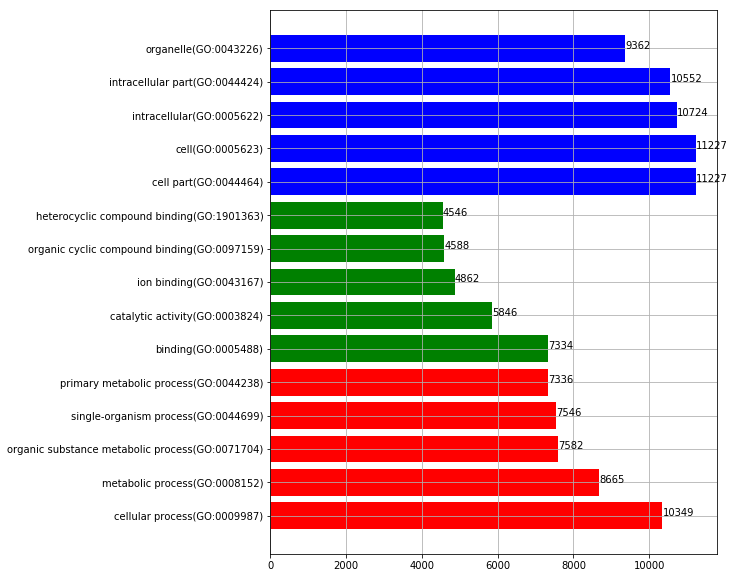

In [26]:
%matplotlib inline

bar_color = dict()
bar_color['GO_BP'] = 'red'
bar_color['GO_MF'] = 'green'
bar_color['GO_CC'] = 'blue'

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)

label_list = []
i = 0
for tmp_category in ['GO_BP','GO_MF','GO_CC']:
    for tmp_GO in GO_term_list[tmp_category][:5]:
        tmp_color = bar_color[tmp_category]
        ax1.barh(i, GO_freq[tmp_category][tmp_GO], facecolor=tmp_color)
        ax1.text(GO_freq[tmp_category][tmp_GO]+10, i,'%d'%GO_freq[tmp_category][tmp_GO])
        label_list.append('%s(%s)'%(GO_desc[tmp_GO], tmp_GO))
        i += 1

ax1.set_yticks([x for x in range(i)])
ax1.set_yticklabels(label_list)
ax1.grid()
plt.show()